***
# Modelado
***

In [1]:
import pandas as pd

from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
evaluate = pd.read_csv('/content/evaluate_jned.csv')
evaluate.head()

,CUS_CUST_ID_BUY,churn,MAU_MP_3,MAU_ML_3,MAU_MP_2,MAU_ML_2,MAU_MP_1,MAU_ML_1,last_login_mp_date_1_c,last_login_ml_date_1_c,...,Mes2,Mes3,Mes4,Mes5,Mes6,mediana_gastado,mediana_descuento,%_descuento,tpv_segment,tpv_segment_frec
0,20663512,1,13.0,25.0,14.0,24.0,5.0,25.0,3,3,...,2.0,1.0,2.0,2.0,1.0,9.69220,0.0000,0.000000,2,6
1,444286946,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,4.0,0.0,0.0,0.0,0.0,4.38515,1.2635,0.225002,1,3
2,348084528,1,4.0,4.0,4.0,3.0,3.0,8.0,3,3,...,8.0,1.0,2.0,4.0,0.0,12.23230,0.0000,0.000000,3,9
3,59232755,1,0.0,28.0,0.0,25.0,0.0,18.0,3,3,...,9.0,6.0,0.0,0.0,0.0,41.64730,0.0000,0.000000,3,9
4,168821213,1,0.0,21.0,4.0,13.0,6.0,18.0,3,3,...,6.0,4.0,5.0,1.0,0.0,2.27430,0.0000,0.000000,0,13


### Hyperparameter Tuning

In [45]:
y = evaluate['churn']
X = evaluate.drop(columns = ['CUS_CUST_ID_BUY', 'churn'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.head()

,MAU_MP_3,MAU_ML_3,MAU_MP_2,MAU_ML_2,MAU_MP_1,MAU_ML_1,last_login_mp_date_1_c,last_login_ml_date_1_c,CITY,GENDER,...,Mes2,Mes3,Mes4,Mes5,Mes6,mediana_gastado,mediana_descuento,%_descuento,tpv_segment,tpv_segment_frec
0,1.106713,1.509664,1.212759,1.532620,-0.177166,1.494992,0.601181,0.543593,1.913728,-0.029961,...,-0.120118,-0.200982,-0.020820,0.022083,-0.091875,-0.159008,-0.454251,-0.451849,0.322452,-0.135255
1,NaN,NaN,NaN,NaN,NaN,NaN,-2.100530,-2.185790,-0.767454,1.160313,...,0.105957,-0.324092,-0.309675,-0.303229,-0.277048,-0.260231,1.013397,1.215409,-0.440772,-0.241959
2,-0.199530,-0.688108,-0.251800,-0.729978,-0.454259,-0.249057,0.601181,0.543593,1.039643,-0.029961,...,0.558108,-0.200982,-0.020820,0.347395,-0.277048,-0.110560,-0.454251,-0.451849,1.085676,-0.028550
3,-0.780082,1.823631,-0.837624,1.640363,-0.869898,0.776854,0.601181,0.543593,-0.057383,1.160313,...,0.671145,0.414567,-0.309675,-0.303229,-0.277048,0.450481,-0.454251,-0.451849,1.085676,-0.028550
4,-0.780082,1.091041,-0.251800,0.347450,-0.038620,0.776854,0.601181,0.543593,0.404213,-0.029961,...,0.332032,0.168347,0.412463,-0.140573,-0.277048,-0.300492,-0.454251,-0.451849,-1.203997,0.113723


In [14]:
# Montecarlo cross-validation
mc = ShuffleSplit(n_splits= 10, test_size=.2, random_state=42)


param_grid = {
        'min_child_weight': [3, 6],
        'gamma': [0, 1, 4],
        'subsample': [0.5, 1.0],
        'max_depth': [3, 5]
        }


xgbc = XGBClassifier(objective = "binary:logistic")

grid_search = GridSearchCV(xgbc, param_grid, cv= mc, scoring='balanced_accuracy', verbose = 3, n_jobs= -1)

grid_search.fit(X_scaled, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 1, 4], 'max_depth': [3, 5],
                         'min_child_weight': [3, 6], 'subsample': [0.5, 1.0]},
             scoring='balanced_accuracy', verbose=3)

In [15]:
print("best params: ", grid_search.best_params_)
print("best score: ", grid_search.best_score_)

best params:  {'gamma': 4, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.5}
best score:  0.7869231774324945


## Train-Test

In [17]:
# Se calculan las métricas de interés
def calculate_metrics(prediction, y_test):
    cm = confusion_matrix(y_test, prediction)
    total = sum(sum(cm))
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    # sensitivity = recall
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    balanced_accuracy = (sensitivity + specificity)/2
    
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    
    f1 = 2 * ((precision * sensitivity) / (precision + sensitivity))
    
    metrics = [specificity, sensitivity, balanced_accuracy, f1]
    
    # Retorna vector con las métricas
    return metrics

def toLongFormat(dataset):
    value_vars = ['Specificity', 'Sensitivity', 'Balanced Accuracy', 'F1']
    return pd.melt(dataset.reset_index(), value_vars= value_vars, var_name='Metrics', value_name='Value')

In [47]:
# Montecarlo cross-validation
mc = ShuffleSplit(n_splits= 30, test_size=.2, random_state=42)

metricas = []

for train_idx, test_idx in mc.split(X_scaled):   
    X_train, X_test = X_scaled.loc[train_idx], X_scaled.loc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.1,
                                                      random_state=42)
    # Balanceo las clases
    # Se define la estrategia de remuestreo
    oversample = RandomOverSampler(sampling_strategy= 0.75)
    # Se aplica la transformación
    x_train_pre, y_train_pre = oversample.fit_resample(X_train, y_train)

    # Parámetros despues del barrido de parámetros
    xgbc_model = XGBClassifier(objective = "binary:logistic",
                               subsample = 0.5,
                               max_depth = 3,
                               min_child_weight = 3,
                               gamma = 4)
    
    # Se entrena el modelo
    xgbc_model.fit(x_train_pre, y_train_pre,
                  early_stopping_rounds= 20,
                  eval_set=[(x_train_pre, y_train_pre), (X_val, y_val)],
                  verbose = False)
    
    # Predicciones
    y_pred = xgbc_model.predict(X_test)
    
    # Evaluación y almacenamiento de métricas
    metricas.append(calculate_metrics(y_pred, y_test))

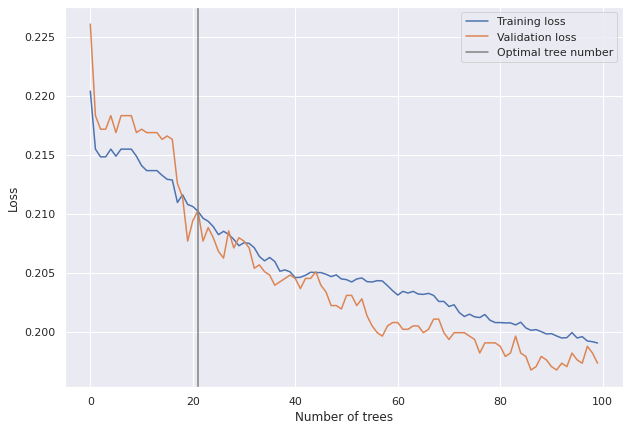

In [48]:
results = xgbc_model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["error"], label="Training loss")
plt.plot(results["validation_1"]["error"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

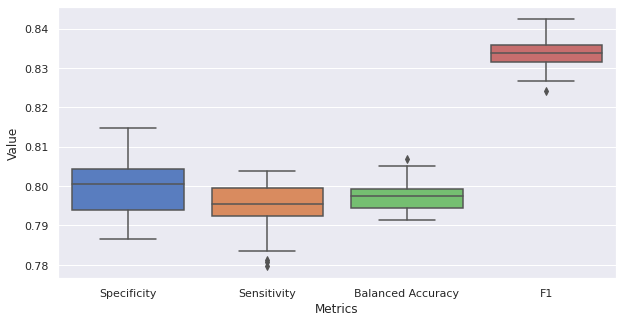

In [49]:
# Se observan los resultados 
metricas_df = pd.DataFrame(metricas, columns = ['Specificity', 'Sensitivity', 'Balanced Accuracy', 'F1'])

metricas_df = toLongFormat(metricas_df)

sns.set(rc={'figure.figsize':(10 , 5)})
sns.boxplot(x="Metrics", y="Value", data=metricas_df,palette="muted")

[Text(0, 0.5, 'FEATURES'),
 Text(0.5, 0, 'IMPORTANCE'),
 Text(0.5, 1.0, 'FEATURE IMPORTANCE')]

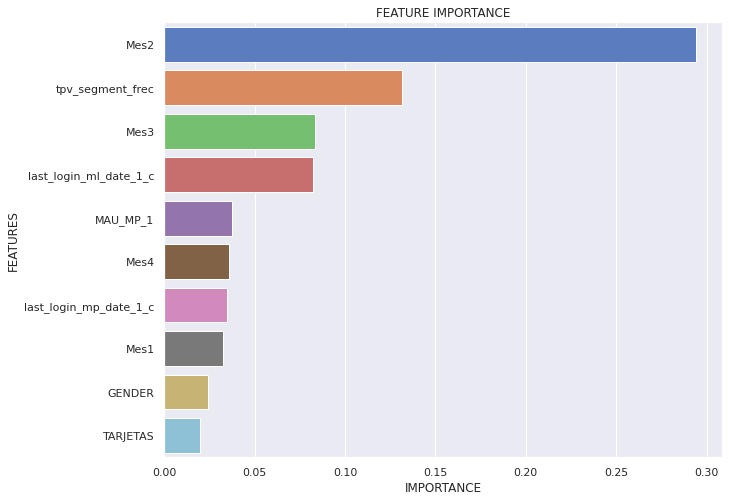

In [50]:
# 10 atributos más importantes
fi = pd.DataFrame({'feature': list(x_train_pre.columns),
                   'importance': xgbc_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

sns.set(rc={'figure.figsize':(10 , 8)})
ax = sns.barplot(x="importance", y="feature", data=fi.head(10),palette="muted", orient = 'h')

ax.set(xlabel= 'IMPORTANCE',
       ylabel= 'FEATURES',
       title = 'FEATURE IMPORTANCE')